## `concurrent.futures`

This module provides a high-level interface for **`asynchronously`** executing callables. The asynchronous execution can be performed using threads (`ThreadPoolExecutor`), or separate processes (`ProcessPoolExecutor`). Both the classes implement the same abstract `Executor` class.

### `Executor` 

`Executor` is an abstract class which has two implemented subclasses which can be used 

- `ThreadPoolExecutor`
- `ProcessPoolExecutor`

#### Base Task

Lets create a function which can take parame

In [18]:
# Python 3.
from concurrent import futures
import datetime
import itertools
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

WORKERS=5
ITERS=15

def task(Executor, function):
    start_time = datetime.datetime.now()
    with Executor(max_workers=WORKERS) as ex:
        result = list(ex.map(function, itertools.repeat(start_time, ITERS)))

    start, stop = np.array(result).T
    return start, stop

In [21]:
def idle(start_time):
    elapsed = lambda: (datetime.datetime.now() - start_time).total_seconds()
    start = elapsed()
    time.sleep(2)
    stop = elapsed()
    return (start, stop)

def busy(start_time):
    elapsed = lambda: (datetime.datetime.now() - start_time).total_seconds()
    start = elapsed()
    sum(range(10**7))
    stop = elapsed()
    return (start, stop)

In [22]:
def plot(start, stop, title):
    elapsed = stop - start
    plt.barh(range(len(start)), elapsed, left=start)
    plt.ylabel("Task number")
    plt.xlabel("Seconds")
    plt.grid(axis='x')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.savefig("{}.svg".format(title.replace(" ", "-")))

### ThreadPoolExecutor

It uses a **pool of threads** to execute calls asynchronously. As stated earlier that it is a subclass of `Executor` class we can call `task` function with `futures.ThreadPoolExecutor` as first parameter.

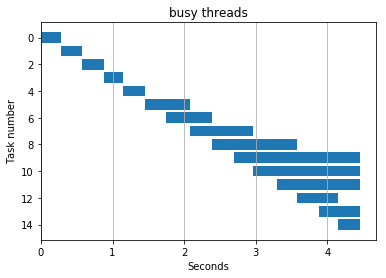

In [16]:
plot(*task(futures.ThreadPoolExecutor, busy), title="busy threads")

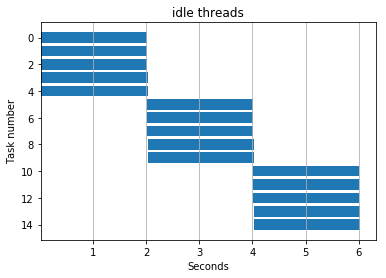

In [13]:
plot(*task(futures.ThreadPoolExecutor, idle), title="idle threads")

> **<center>Note</center>**
> <hr/>
> - Deadlocks can occur when the callable associated with a Future waits on the results of another Future

### `ProcessPoolExecutor`

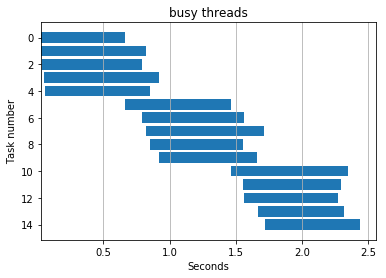

In [14]:
plot(*task(futures.ProcessPoolExecutor, busy), title="busy threads")

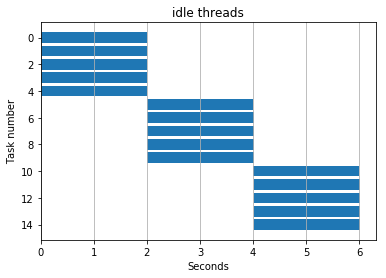

In [15]:
plot(*task(futures.ThreadPoolExecutor, idle), title="idle threads")